In [1]:
import itertools
import copy
from collections import namedtuple
from enum import Enum
import math
from functools import reduce
from operator import mul

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
# sns.set(style="darkgrid")

%matplotlib inline
# %matplotlib notebook
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from data_handler import CustomDataset

ModuleNotFoundError: No module named 'data_handler'

In [12]:
def getEmptyDataFrame() -> pd.DataFrame:
    """
    Gets an empty dataframe used to represent the training information
    """
    DF_COLUMNS = ['Epoch', 'Loss', 'Run Type', 'Model', 'config']
    return pd.DataFrame(columns=DF_COLUMNS)

def graphCompareModelLosses(data, dep_axis_title, graph_title, output_name):
    """
    Args:
        data (list): List of dataframe loss data for each model
        graph_title (str): string name of graph title
        output_name (str): string name of the output png (not including extension)
        
    Outputs:
        Seaborn plot of loss data for training/testing the models
    """
    # Create dataframes for data input and join
    df = getEmptyDataFrame()
    
    # Join dataframes
    for d in data:
        df = df.append(d, ignore_index=True)

    sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20, 
                                 'xtick.labelsize': 15, 'ytick.labelsize': 15, 'legend.fontsize': 20}) 
    fig, ax = plt.subplots()
#     fig.set_size_inches(11.7, 8.27)
    ax.set_title(graph_title)
#     ax.set
    g = sns.lineplot(x="Epoch", y="Loss", hue="Model", style="Run Type", data=df)
    g.set(ylabel=dep_axis_title)
    ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
#     ax.legend(bbox_to_anchor=(1.1, 1.05))
    fig.savefig("../pictures/" + output_name + '.png', facecolor=fig.get_facecolor(), dpi=600)

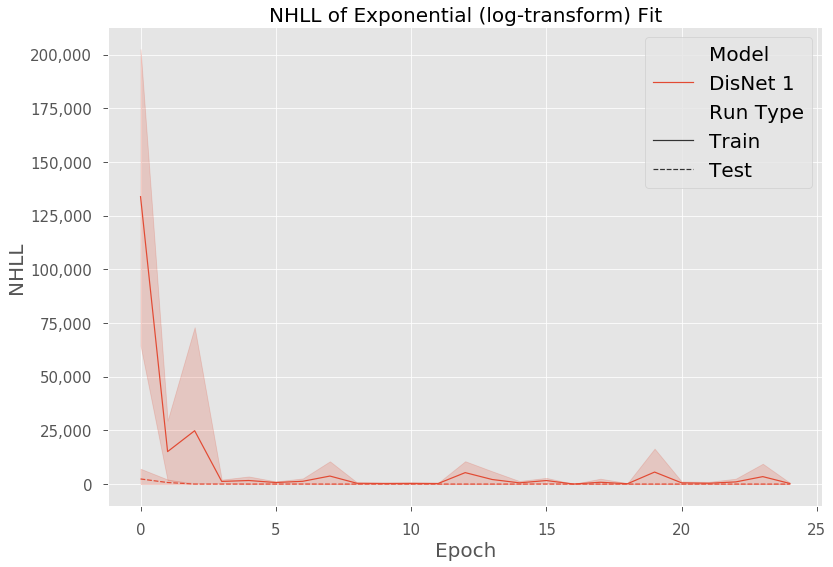

In [70]:
data = []
for i in range(0, 18):
    data.append(pd.read_pickle("../gridsearch_dfs/df_INVERSE_GAUSSIAN_DOUBLE_{}.pkl".format(i+1)))
data = [data[0]]
# del data[6]
# del data[-1]
graphCompareModelLosses(data, dep_axis_title="NHLL", 
                        graph_title="NHLL of Exponential (log-transform) Fit", output_name="test")

In [66]:
# pd.read_pickle("../gridsearch_dfs/df_LOG_NORMAL_CONSTANT_{}.pkl".format(i+1))
# data = [data[3], data[7], data[0]]

# pd.read_pickle("../gridsearch_dfs/df_LOG_NORMAL_DOUBLE_{}.pkl".format(i+1))
# data = [data[0], data[1], data[2], data[5], data[6], data[8], data[10]]
# gradient_clipping 0.1 or 0.01
# First conv side 8 or 16
# start rate 1e-3
#data[6], data[2], data[8]
# [data[1], data[2], data[3], data[6], data[7], data[9], data[11]]

# pd.read_pickle("../gridsearch_dfs/df_LOG_NORMAL_HALF_{}.pkl".format(i+1))
# data = [data[0], data[5], data[6], data[1], data[14]]

# -----------------------------------
# pd.read_pickle("../gridsearch_dfs/df_INVERSE_GAUSSIAN_DOUBLE_{}.pkl".format(i+1))
# data = [data[0], data[1]]
# pd.read_pickle("../gridsearch_dfs/df_INVERSE_GAUSSIAN_HALF_{}.pkl".format(i+1))
# data = [data[0], data[3]]

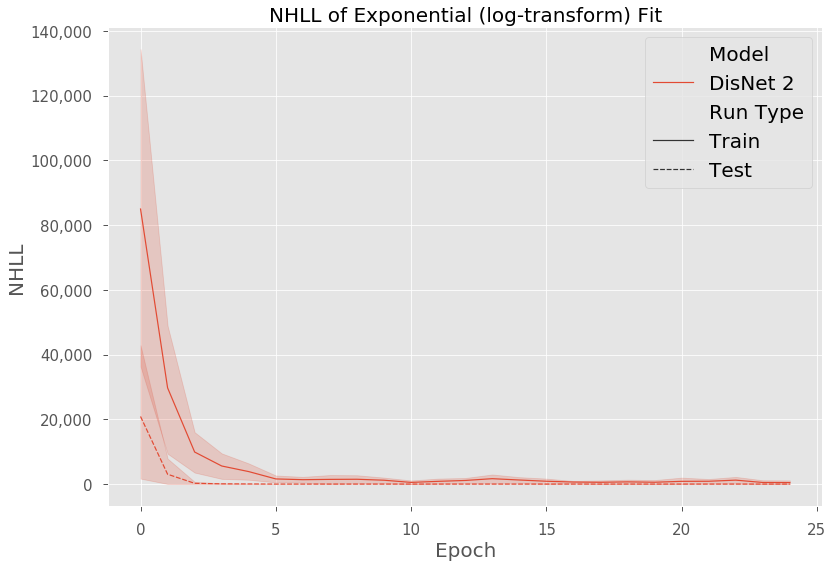

In [88]:
data1 = []
data2 = []
data3 = []
data = []
for i in range(0, 18):
    data.append(pd.read_pickle("../gridsearch_dfs/df_LOG_NORMAL_DOUBLE_{}.pkl".format(i+1)))
data = [data[1]]
# del data[6]
# del data[-1]
graphCompareModelLosses(data, dep_axis_title="NHLL", 
                        graph_title="NHLL of Exponential (log-transform) Fit", output_name="test")

In [11]:
data = pd.read_pickle("../kfold_dfs/df_NORMAL_samp--1-lb-0-div-1.pkl")
data = data[data['Run Type'] != "Train"]
# data = data[data['Run Type'] != "KS"]
data = data[data['Epoch'] != 0]
data
# graphCompareModelLosses([data], dep_axis_title="NHLL", 
#                         graph_title="NHLL of Exponential (log-transform) Fit", output_name="test")

,Epoch,Loss,Run Type,Model,config
8,1,0.000000,Train_Eval,DisNet,samp--1-lb-0-div-1
9,1,2.098663,Test,DisNet,samp--1-lb-0-div-1
10,1,0.631313,KS,DisNet,samp--1-lb-0-div-1
11,1,3.282828,T,DisNet,samp--1-lb-0-div-1
12,1,1.638524,D-MEAN,DisNet,samp--1-lb-0-div-1
...,...,...,...,...,...
30,4,2.006470,Test,DisNet,samp--1-lb-0-div-1
31,4,0.252525,KS,DisNet,samp--1-lb-0-div-1
32,4,3.409091,T,DisNet,samp--1-lb-0-div-1
33,4,1.546994,D-MEAN,DisNet,samp--1-lb-0-div-1


In [40]:
def graphCompareModelKS(data, dep_axis_title, graph_title, output_name=None):
    """
    Args:
        data (list): List of dataframe loss data for each model
        graph_title (str): string name of graph title
        output_name (str): string name of the output png (not including extension)
        
    Outputs:
        Seaborn plot of loss data for training/testing the models
    """
    # Create dataframes for data input and join
    df = getEmptyDataFrame()
    
    # Join dataframes
    for d in data:
        df = df.append(d[d['Run Type'] == "KS"], ignore_index=True)

    sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20, 
                                 'xtick.labelsize': 15, 'ytick.labelsize': 15, 'legend.fontsize': 20}) 
    fig, ax = plt.subplots()
    ax.set_title(graph_title)
    g = sns.lineplot(x="Epoch", y="Loss", hue="Model", style="Run Type", data=df)
    g.set(ylabel=dep_axis_title)
    ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
    if output_name != None:
        fig.savefig("../pictures/" + output_name + '.png', facecolor=fig.get_facecolor())

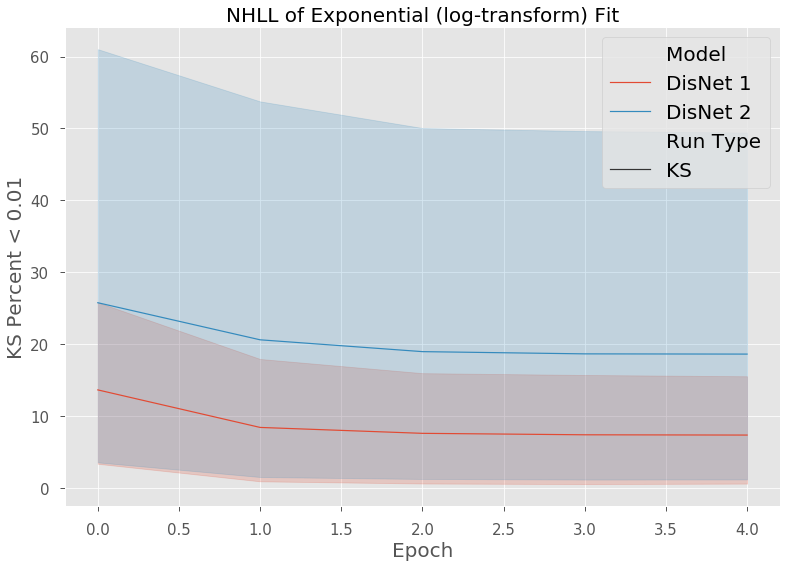

In [112]:
data = []
for i in range(1, 3):
    data.append(pd.read_pickle("../ssl_compare_dfs/df_{}.pkl".format(i)))
graphCompareModelKS(data, dep_axis_title="KS Percent < 0.01", graph_title="NHLL of Exponential (log-transform) Fit")

In [46]:
def graphCompareModelValidationLoss(data, dep_axis_title, graph_title, samps=None, scale=None, output_name=None):
    """
    Args:
        data (list): List of dataframe loss data for each model
        graph_title (str): string name of graph title
        output_name (str): string name of the output png (not including extension)
        
    Outputs:
        Seaborn plot of loss data for training/testing the models
    """
    sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20, 
                                 'xtick.labelsize': 15, 'ytick.labelsize': 15, 'legend.fontsize': 10}) 
    if samps:
        data = data[data['config'].str.contains('{}'.format(samps))]
    fig, ax = plt.subplots()
    ax.set_title(graph_title)
    g = sns.lineplot(x="Epoch", y="Loss", hue="config", style="Run Type", data=data)
    g.set(ylabel=dep_axis_title)
    ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.xticks(np.arange(data['Epoch'].min(), data['Epoch'].max()+1, 2.0))
    if scale:
        plt.yscale('symlog')
    if output_name != None:
        fig.savefig("../pictures/" + output_name + '.png', facecolor=fig.get_facecolor(), dpi=600)

# SSL

In [305]:
data = []
max_samples = [99, 198, 396, 792, 1584, 3168]
lbs = [0, 1, 2, 4]
df_lognormal_ssl = getEmptyDataFrame()
df_invgauss_ssl = getEmptyDataFrame()
# Join dataget
for ms in max_samples:
    for lb in lbs:
        try:
            df_lognormal_ssl = df_lognormal_ssl.append(pd.read_pickle("../ssl_compare_dfs/df_{}_{}_{}.pkl".format("LOG_NORMAL_CONSTANT", ms, lb)), 
                                           ignore_index=True)
        except:
            pass
        try:
            df_invgauss_ssl = df_invgauss_ssl.append(pd.read_pickle("../ssl_compare_dfs/df_{}_{}_{}.pkl".format("INV_GAUSS_CONSTANT", ms, lb)), 
                                           ignore_index=True)
        except:
            pass
# Filter
df_lognormal_ssl_ks = df_lognormal_ssl[df_lognormal_ssl['Run Type'] == "KS"]
df_lognormal_ssl_test = df_lognormal_ssl[df_lognormal_ssl['Run Type'] == "Test"]
df_lognormal_ssl_eval = df_lognormal_ssl[df_lognormal_ssl['Run Type'] == "Train_Eval"]
df_lognormal_ssl_train = df_lognormal_ssl[(df_lognormal_ssl['Run Type'] == "Test") | (df_lognormal_ssl['Run Type'] == "Train_Eval")]
# Filter
df_invgauss_ssl_ks = df_invgauss_ssl[df_invgauss_ssl['Run Type'] == "KS"]
df_invgauss_ssl_test = df_invgauss_ssl[df_invgauss_ssl['Run Type'] == "Test"]
df_invgauss_ssl_eval = df_invgauss_ssl[df_invgauss_ssl['Run Type'] == "Train_Eval"]
df_invgauss_ssl_train = df_invgauss_ssl[(df_invgauss_ssl['Run Type'] == "Test") | (df_invgauss_ssl['Run Type'] == "Train_Eval")]

In [118]:
data = []
lbs = [0, 1, 2, 4]
df_norm_ssl = getEmptyDataFrame()
df_bayes_ssl = getEmptyDataFrame()

norm_path = "../kfold_dfs/df_NORMAL_samp--1-lb-{}-div-1.pkl"
bayes_path = "../kfold_dfs/df_BAYESIAN_samp--1-lb-{}-div-1.pkl"

# Join data
for lb in lbs:
    try:
        df_norm_ssl = df_norm_ssl.append(pd.read_pickle(norm_path.format(lb)), ignore_index=True)
    except:
        pass
    try:
        df_bayes_ssl = df_bayes_ssl.append(pd.read_pickle(bayes_path.format(lb)), ignore_index=True)
    except:
        pass

df_norm_ssl_ks = df_norm_ssl[df_norm_ssl['Run Type'] == "KS"]
df_norm_ssl_t = df_norm_ssl[df_norm_ssl['Run Type'] == "T"]
df_norm_ssl_train = df_norm_ssl[df_norm_ssl['Run Type'] == "Train"]
df_norm_ssl_test = df_norm_ssl[df_norm_ssl['Run Type'] == "Test"]
df_norm_ssl_eval = df_norm_ssl[df_norm_ssl['Run Type'] == "Train_Eval"]
df_norm_ssl_d = df_norm_ssl[df_norm_ssl['Run Type'] == "D-MEAN"]
df_norm_ssl_v = df_norm_ssl[df_norm_ssl['Run Type'] == "VAR"]
df_norm_ssl_traintest = df_norm_ssl[(df_norm_ssl['Run Type'] == "Test") | (df_norm_ssl['Run Type'] == "Train_Eval")]

df_bayes_ssl_ks = df_bayes_ssl[df_bayes_ssl['Run Type'] == "KS"]
df_bayes_ssl_t = df_bayes_ssl[df_bayes_ssl['Run Type'] == "T"]
df_bayes_ssl_train = df_bayes_ssl[df_bayes_ssl['Run Type'] == "Train"]
df_bayes_ssl_test = df_bayes_ssl[df_bayes_ssl['Run Type'] == "Test"]
df_bayes_ssl_d = df_bayes_ssl[df_bayes_ssl['Run Type'] == "D-MEAN"]
df_bayes_ssl_v = df_bayes_ssl[df_bayes_ssl['Run Type'] == "VAR"]
df_bayes_ssl_traintest = df_bayes_ssl[(df_bayes_ssl['Run Type'] == "Test") | (df_bayes_ssl['Run Type'] == "Train")]

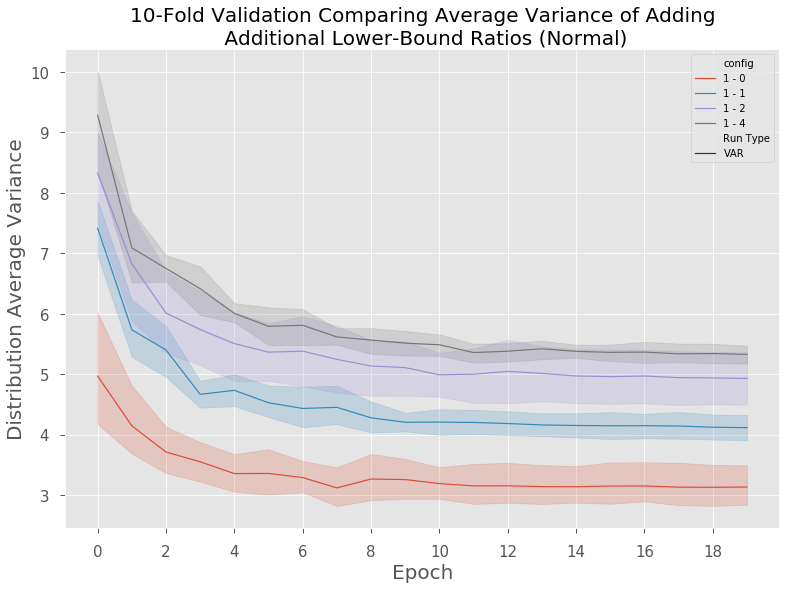

In [135]:
# data_ver = df_lognormal_div_ks
# data_ver = df_invgauss_div_ks
# data_ver = df_bayes_div_traintest[df_bayes_div_traintest['Epoch'] != 0]
# bayes_test_additional_data
data_ver = df_norm_ssl_v
data_ver = data_ver.replace('samp--1-lb-0-div-1', '1 - 0')
data_ver = data_ver.replace('samp--1-lb-1-div-1', '1 - 1')
data_ver = data_ver.replace('samp--1-lb-2-div-1', '1 - 2')
data_ver = data_ver.replace('samp--1-lb-4-div-1', '1 - 4')
graphCompareModelValidationLoss(data_ver, dep_axis_title="Distribution Average Variance", graph_title="10-Fold Validation Comparing Average Variance of Adding\n Additional Lower-Bound Ratios (Normal)",
                               samps=None, scale=False, output_name="norm_v_additional_data")

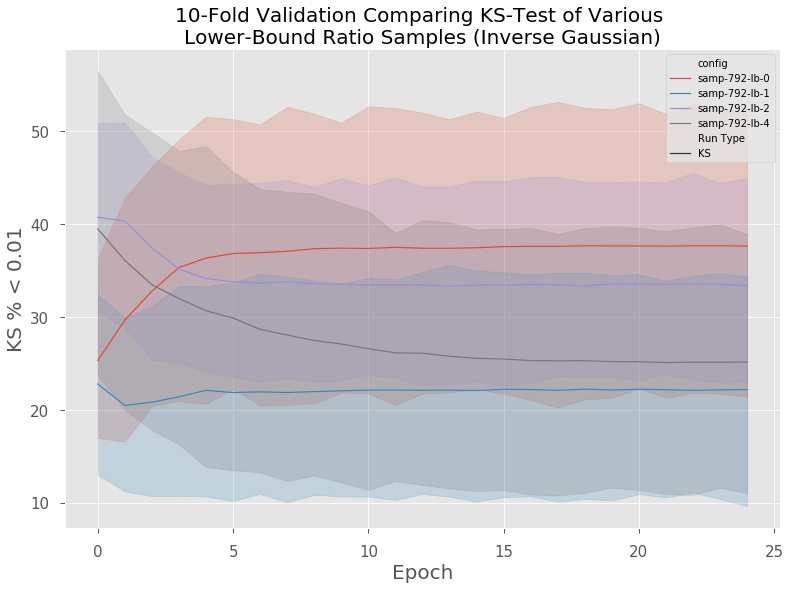

In [308]:
samps = 792
# data_ver = df_lognormal_ssl_ks
data_ver = df_invgauss_ssl_ks
graphCompareModelValidationLoss(data_ver, dep_axis_title="KS % < 0.01", graph_title="10-Fold Validation Comparing KS-Test of Various \nLower-Bound Ratio Samples (Inverse Gaussian)",
                               samps=samps, scale=False, output_name="invgauss_ks_ssl_{}".format(samps))

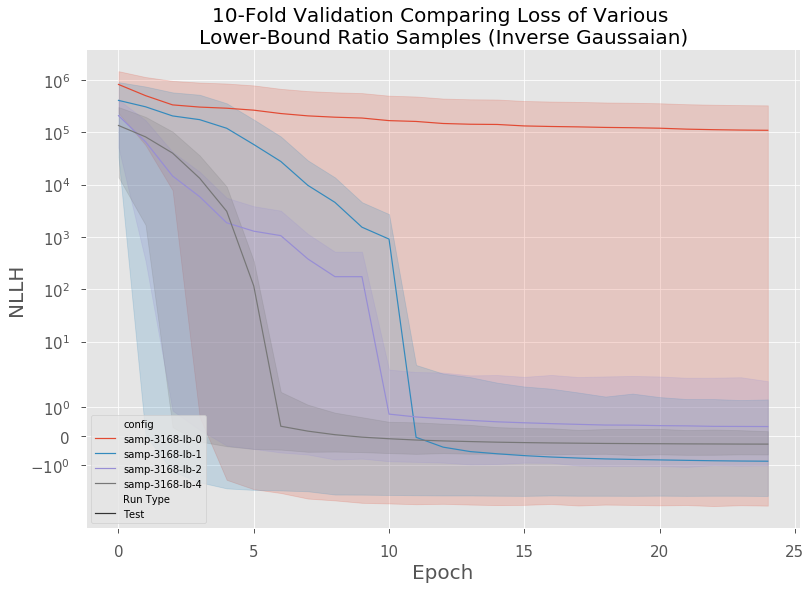

In [314]:
samps = 3168
# data_ver = df_lognormal_ssl_test
data_ver = df_invgauss_ssl_test
graphCompareModelValidationLoss(df_lognormal_ssl_test, dep_axis_title="NLLH", graph_title="10-Fold Validation Comparing Loss of Various \nLower-Bound Ratio Samples (Inverse Gaussaian)",
                               samps=samps, scale=True, output_name="invgauss_nllh_ssl_{}_logscale".format(samps))

# Datadiv

In [266]:
data = []
max_samples = [4]
lbs = [0, 1, 2, 4]
df_lognormal_div = getEmptyDataFrame()
df_invgauss_div = getEmptyDataFrame()

# Join data
for ms in max_samples:
    for lb in lbs:
        try:
            df_lognormal_div = df_lognormal_div.append(pd.read_pickle("../datadiv_compare_dfs/df_{}_{}_{}.pkl".format("LOG_NORMAL_CONSTANT", ms, lb)), 
                                               ignore_index=True)
        except:
            pass
        try:
            df_invgauss_div = df_invgauss_div.append(pd.read_pickle("../datadiv_compare_dfs/df_{}_{}_{}.pkl".format("INV_GAUSS_CONSTANT", ms, lb)), 
                                               ignore_index=True)
        except:
            pass
# Filter
df_lognormal_div_ks = df_lognormal_div[df_lognormal_div['Run Type'] == "KS"]
df_lognormal_div_test = df_lognormal_div[df_lognormal_div['Run Type'] == "Test"]
df_lognormal_div_eval = df_lognormal_div[df_lognormal_div['Run Type'] == "Train_Eval"]
df_lognormal_div_train = df_lognormal_div[(df_lognormal_div['Run Type'] == "Test") | (df_lognormal_div['Run Type'] == "Train_Eval")]

df_invgauss_div_ks = df_invgauss_div[df_invgauss_div['Run Type'] == "KS"]
df_invgauss_div_test = df_invgauss_div[df_invgauss_div['Run Type'] == "Test"]
df_invgauss_div_eval = df_invgauss_div[df_invgauss_div['Run Type'] == "Train_Eval"]
df_invgauss_div_train = df_invgauss_div[(df_invgauss_div['Run Type'] == "Test") | (df_invgauss_div['Run Type'] == "Train_Eval")]

In [87]:
data = []
lbs = [0, 1, 2, 4]
df_norm_div = getEmptyDataFrame()
df_bayes_div = getEmptyDataFrame()

norm_path = "../kfold_dfs/df_NORMAL_samp--1-lb-{}-div-{}.pkl"
bayes_path = "../kfold_dfs/df_BAYESIAN_samp--1-lb-{}-div-{}.pkl"

# Join data
for lb in lbs:
    try:
        df_norm_div = df_norm_div.append(pd.read_pickle(norm_path.format(lb, lb+1)), ignore_index=True)
    except:
        pass
    try:
        df_bayes_div = df_bayes_div.append(pd.read_pickle(bayes_path.format(lb, lb+1)), ignore_index=True)
    except:
        pass

df_norm_div_ks = df_norm_div[df_norm_div['Run Type'] == "KS"]
df_norm_div_t = df_norm_div[df_norm_div['Run Type'] == "T"]
df_norm_div_train = df_norm_div[df_norm_div['Run Type'] == "Train"]
df_norm_div_test = df_norm_div[df_norm_div['Run Type'] == "Test"]
df_norm_div_eval = df_norm_div[df_norm_div['Run Type'] == "Train_Eval"]
df_norm_div_d = df_norm_div[df_norm_div['Run Type'] == "D-MEAN"]
df_norm_div_v = df_norm_div[df_norm_div['Run Type'] == "VAR"]
df_norm_div_traintest = df_norm_div[(df_norm_div['Run Type'] == "Test") | (df_norm_div['Run Type'] == "Train_Eval")]

df_bayes_div_ks = df_bayes_div[df_bayes_div['Run Type'] == "KS"]
df_bayes_div_t = df_bayes_div[df_bayes_div['Run Type'] == "T"]
df_bayes_div_train = df_bayes_div[df_bayes_div['Run Type'] == "Train"]
df_bayes_div_test = df_bayes_div[df_bayes_div['Run Type'] == "Test"]
df_bayes_div_d = df_bayes_div[df_bayes_div['Run Type'] == "D-MEAN"]
df_bayes_div_v = df_bayes_div[df_bayes_div['Run Type'] == "VAR"]
df_bayes_div_traintest = df_bayes_div[(df_bayes_div['Run Type'] == "Test") | (df_bayes_div['Run Type'] == "Train")]

ValueError: arange: cannot compute length

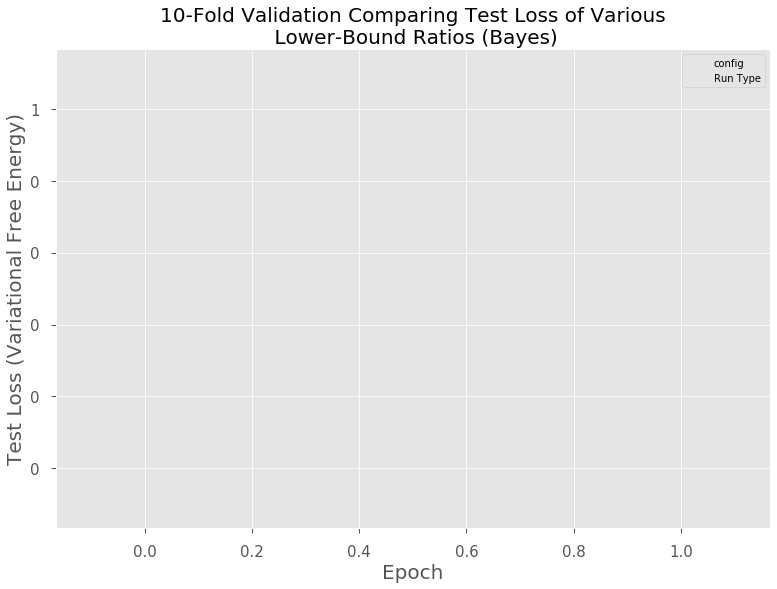

In [110]:
# data_ver = df_lognormal_div_ks
# data_ver = df_invgauss_div_ks
# data_ver = df_bayes_div_traintest[df_bayes_div_traintest['Epoch'] != 0]
# bayes_ks_constant_data
data_ver = df_bayes_ssl_test
data_ver = data_ver.replace('samp--1-lb-0-div-1', '1 - 0')
data_ver = data_ver.replace('samp--1-lb-1-div-2', '1 - 1')
data_ver = data_ver.replace('samp--1-lb-2-div-3', '1 - 2')
data_ver = data_ver.replace('samp--1-lb-4-div-5', '1 - 4')
graphCompareModelValidationLoss(data_ver, dep_axis_title="Test Loss (Variational Free Energy)", graph_title="10-Fold Validation Comparing Test Loss of Various\n Lower-Bound Ratios (Bayes)",
                               samps=None, scale=False, output_name="test")

In [28]:
# data_ver = df_lognormal_div_test
data_ver = df_invgauss_div_test
graphCompareModelValidationLoss(data_ver, dep_axis_title="NLLH", graph_title="10-Fold Validation Comparing Test Set NLLH of Adding\n Additional Lower-Bound Samples (Inverse Gaussian)",
                               samps=None, scale=False, output_name="test")

NameError: name 'df_invgauss_div_t' is not defined

# Dataset

In [326]:
def graphObservations(all_data, max_el=None, output_name=None):
#     [i for i in observations.numpy()[:,0] if i < 0.005]
    fig, ax = plt.subplots()
    for d, l in all_data:
        if max_el:
            sns.distplot([i for i in d if i < max_el], label=l)
        else:
            sns.distplot(d, label=l)
    plt.legend()
    if output_name:
        fig.savefig("../pictures/" + output_name + '.png', facecolor=fig.get_facecolor(), dpi=600)

In [260]:
levelsets = ["train1", "train2", "train3", "train4"]
dataset_ssl1 = CustomDataset(levelsets, 1, 'only_sol')
data_ssl1 = []
for feat, obs in dataset_ssl1:
    data_ssl1.append(obs[0].item())
    
dataset_ssl2 = CustomDataset(levelsets, 2, 'lb_1')
data_ssl2 = []
for feat, obs in dataset_ssl2:
    data_ssl2.append(obs[0].item())
    
dataset_ssl2 = CustomDataset(levelsets, 2, 'lb_1')
data_ssl2 = []
for feat, obs in dataset_ssl2:
    data_ssl2.append(obs[0].item())
    
dataset_ssl3 = CustomDataset(levelsets, 3, 'lb_2')
data_ssl3 = []
for feat, obs in dataset_ssl3:
    data_ssl3.append(obs[0].item())
    
dataset_ssl5 = CustomDataset(levelsets, 5, 'lb_4')
data_ssl5 = []
for feat, obs in dataset_ssl5:
    data_ssl5.append(obs[0].item())

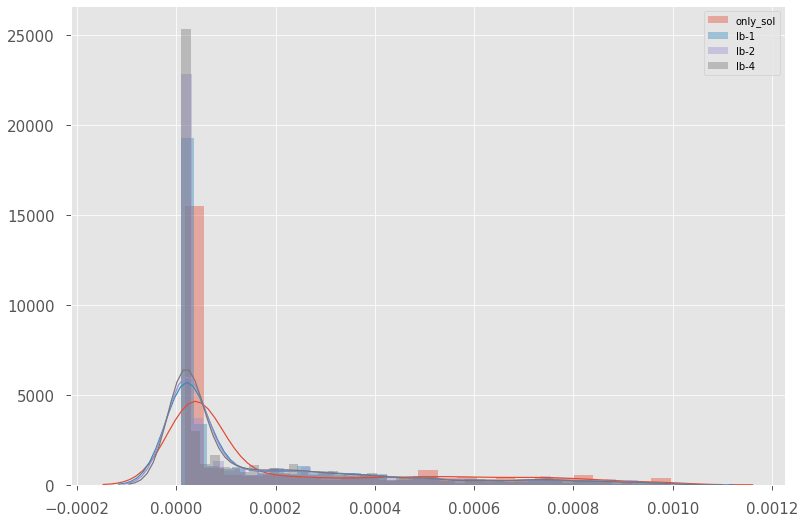

In [327]:
all_data = [(data_ssl1, 'only_sol'), (data_ssl2, 'lb-1'), (data_ssl3, 'lb-2'), (data_ssl5, 'lb-4')]
graphObservations(all_data, max_el=0.001, output_name="compare_complete_datasets")

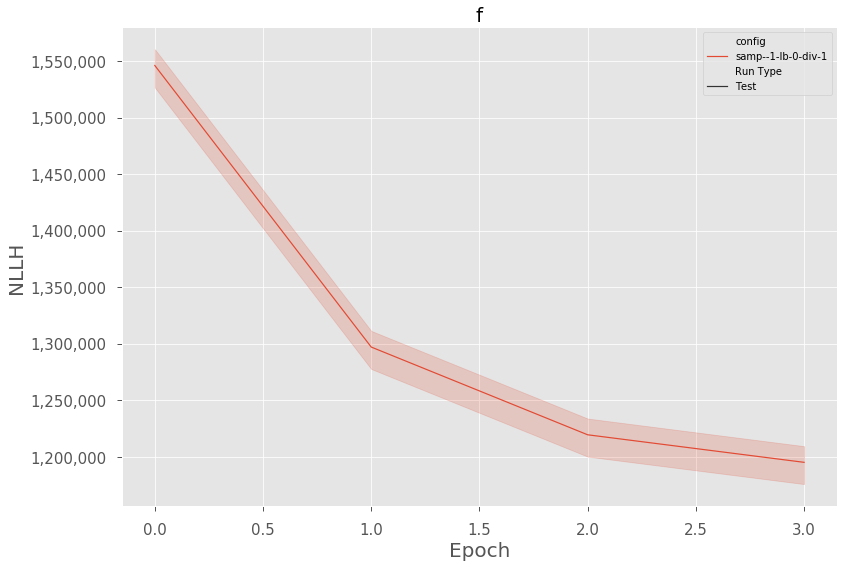

In [10]:
data = pd.read_pickle("../kfold_dfs/df_BAYESIAN_samp--1-lb-0-div-1.pkl")
data = data[data['Run Type'] == 'Test']
graphCompareModelValidationLoss(data, dep_axis_title="NLLH", graph_title="f",
                               samps=None, scale=False, output_name="test")